# Województwo podlaskie
## Analiza ogłoszeń sprzedaży mieszkań

In [119]:
import pandas as pd
import numpy as np

from bs4 import BeautifulSoup
from requests import get
import matplotlib.pyplot as plt

In [120]:
title_list = []
location_list = []
price_list = []
area_list = []

def clear_lists():
    title_list = []
    location_list = []
    price_list = []
    area_list = []

def parse_page(number):
    print(f'pracuję nad stroną nr: {number}')
    page = get(f'{url}&page={number}')
    #page = get(url)
    bs = BeautifulSoup(page.content)
    for offer in bs.find_all(attrs={'data-cy': 'l-card'}):
        footer = offer.find('p',class_='css-p6wsjo-Text eu5v0x0').get_text()
        location = footer.split()[0]
        location.replace(',','')
        #print(footer)  #- to jest cena
        price = parse_price(offer.find('p',class_='css-1q7gvpp-Text eu5v0x0').get_text())
        #price = footer.split()[0]
        title = offer.find('h6', class_='css-1pvd0aj-Text eu5v0x0').get_text()
        area = float(offer.find('div',class_= 'css-1kfqt7f').get_text().split()[0].strip().replace(',','.').replace('m2',''))
        title_list.append(title)
        location_list.append(location)
        price_list.append(price)
        area_list.append(area)

In [121]:
def parse_price(price):
    return float(price.replace(' ','').replace('zł','').replace('donegocjacji','').replace(',','.'))

def parse_city(df):
    czarna = df["city"] == "Czarna"
    df.loc[czarna, "city"] = "Czarna Białostocka"
    df.loc[df['city'] == "Białystok,", 'city'] = "Białystok"
    df.loc[df['city'] == "Bielsk", 'city'] = "Bielsk Podlaski"

In [124]:
df.city.unique()

NameError: name 'df' is not defined

In [122]:
## tworzenie ramki danych i zapis danych do pliku
def create_frame(nr):
    matrix = np.matrix([title_list,location_list, price_list,area_list])
    df = pd.DataFrame(data=matrix)
    df = df.T
    df = df.rename(columns={0:'title', 1:'city', 2:'price', 3:'area'})
    df['rooms'] = nr
    df.price=df.price.astype(float)
    df.area=df.area.astype(float)
    df['cena m2']=df['price']/df['area'].round(2)
    parse_city(df)
    return df

## Dla mieszkań jednopokojowych ##

In [123]:
url = 'https://www.olx.pl/d/nieruchomosci/mieszkania/sprzedaz/podlaskie/?search%5Bfilter_enum_rooms%5D%5B0%5D=one'

clear_lists()
for page in range(1,3):  #ilość stron z ogłoszeniami
    parse_page(page)
    
df_1 = create_frame(1)
df_1.to_json("./mieszkania_OLX_1_rooms.json")

pracuję nad stroną nr: 1
pracuję nad stroną nr: 2


## Dla mieszkań dwupokojowych ##

In [85]:
url = 'https://www.olx.pl/d/nieruchomosci/mieszkania/sprzedaz/podlaskie/?search%5Bfilter_enum_rooms%5D%5B0%5D=two'

clear_lists()
for page in range(1,11):  #ilość stron z ogłoszeniami
    parse_page(page)
    
df_2 = create_frame(2)
df_2.to_json("./mieszkania_OLX_2_rooms.json")

pracuję nad stroną nr: 1
pracuję nad stroną nr: 2
pracuję nad stroną nr: 3
pracuję nad stroną nr: 4
pracuję nad stroną nr: 5
pracuję nad stroną nr: 6
pracuję nad stroną nr: 7
pracuję nad stroną nr: 8
pracuję nad stroną nr: 9
pracuję nad stroną nr: 10


## Dla mieszkań trzypokojowych ##

In [86]:
url = 'https://www.olx.pl/d/nieruchomosci/mieszkania/sprzedaz/podlaskie/?search%5Bfilter_enum_rooms%5D%5B0%5D=three'

clear_lists()
for page in range(1,12):  #ilość stron z ogłoszeniami
    parse_page(page)
    
df_3 = create_frame(3)
df_3.to_json("./mieszkania_OLX_3_rooms.json")

pracuję nad stroną nr: 1
pracuję nad stroną nr: 2
pracuję nad stroną nr: 3
pracuję nad stroną nr: 4
pracuję nad stroną nr: 5
pracuję nad stroną nr: 6
pracuję nad stroną nr: 7
pracuję nad stroną nr: 8
pracuję nad stroną nr: 9
pracuję nad stroną nr: 10
pracuję nad stroną nr: 11


## Dla mieszkań z czterema i więcej pokojami

In [93]:
url = 'https://www.olx.pl/d/nieruchomosci/mieszkania/sprzedaz/podlaskie/?search%5Bfilter_enum_rooms%5D%5B0%5D=four'

clear_lists()
for page in range(1,4):  #ilość stron z ogłoszeniami
    parse_page(page)
    
df_4 = create_frame(4)
df_4.to_json("./mieszkania_OLX_4_rooms.json")

pracuję nad stroną nr: 1
pracuję nad stroną nr: 2
pracuję nad stroną nr: 3


## Wczytywanie zbiorów i łączenie danych w jedną ramkę danych

In [5]:
df_1 = pd.read_json("./mieszkania_OLX_1_rooms.json")
df_2 = pd.read_json("./mieszkania_OLX_2_rooms.json")
df_3 = pd.read_json("./mieszkania_OLX_3_rooms.json")
df_4 = pd.read_json("./mieszkania_OLX_4_rooms.json")
df_concat= pd.concat([df_1,df_2,df_3,df_4], sort=False)

In [6]:
df_1.describe()

,price,area,rooms,cena m2
count,30.000000,30.000000,30.0,30.000000
mean,239309.633333,29.356667,1.0,8233.865289
std,67918.055067,4.983143,0.0,2067.402549
min,141000.000000,22.000000,1.0,4264.705882
25%,188925.000000,25.135000,1.0,6629.689850
50%,249000.000000,29.300000,1.0,8681.746032
75%,259000.000000,31.597500,1.0,9633.873769
max,430000.000000,46.300000,1.0,11449.275362


In [7]:
df_concat.describe()
df_concat.sample(30)

,title,city,price,area,rooms,cena m2
222,Sprzedam mieszkanie w apartamentowcu,Suwałki,360000.0,36.50,3,9863.013699
311,Sprzedam mieszkanie w apartamentowcu,Suwałki,360000.0,36.50,2,9863.013699
470,2pokoje*Centrum*Do Wejścia,Białystok,299000.0,42.00,3,7119.047619
181,** blisko Politechniki ** Cegła ** 2 Pok **,Białystok,319990.0,37.20,4,8601.881720
541,Komfortowe 3 pokojowe dla rodziny z windą,Białystok,396000.0,47.00,4,8425.531915
40,"Centrum, mieszkanie do remontu, bezpośrednio",Białystok,350000.0,53.33,2,6562.910182
120,Przytulne mieszkanie 2-pokojowe na sprzedaż.,Suwałki,256000.0,36.15,3,7081.604426
309,"Bojary, cegła 2018r, Rezerwacja",Białystok,440000.0,43.82,4,10041.077134
793,Duże mieszkanie w nowym bloku,Białystok,549000.0,65.22,4,8417.663293
212,2 - pok 32m2 Bema obok Politechniki Białostock...,Białystok,335000.0,32.07,3,10445.899595


## Wykresy

In [48]:
from matplotlib.ticker import PercentFormatter

total_count = df_concat['title'].count()
total_count

2481

In [55]:
df_city = df_concat.groupby(by=['city'])["cena m2"].agg(["mean","count"])  
df_city.columns = (["Average","Count"])
df_city['Avemshare'] = df_city.Count / total_count  #average market share - średni udział w rynku
df_city = df_city.loc[df_city['Count'] > 3]
df_city

,Average,Count,Avemshare
city,,,
Augustów,7852.070973,42,0.016929
Białowieża,12535.388888,5,0.002015
Białystok,8833.281908,1381,0.556630
Bielsk Podlaski,6445.184572,35,0.014107
Choroszcz,6827.988524,27,0.010883
Ciechanowiec,4608.460846,5,0.002015
Czarna Białostocka,5527.866269,31,0.012495
Goniądz,4264.705882,4,0.001612
Grajewo,5737.487496,29,0.011689


In [47]:
df_rooms = df_concat.groupby(by=['rooms'])["cena m2"].agg(["mean","count"])  
df_rooms.columns = (["Average","Count"])
df_rooms['Avemshare'] = df_rooms.Count / total_count  #average market share - średni udział w rynku
#df_chart = df_chart.loc[df_chart['Liczba'] > 3]
df_rooms

,Average,Count,Avemshare
rooms,,,
1,8233.865289,30,0.012092
2,8197.609220,483,0.194680
3,7807.332305,951,0.383313
4,7782.670488,1017,0.409915


In [117]:
import matplotlib.pyplot as plt

# def addlabels(x,y):
#     for i in range(len(x)):
#         plt.text(i, y[i], y[i], ha = 'center')
        
def combo_visual(df):
    fig, ax = plt.subplots(figsize = (18, 7))
    x = df.index.astype(str)
    y = df["Average"]
    #creating and styling the bar chart
    ax.bar(df.index.astype(str) ,
           df["Average"],
           color = "#000959")
    ax.set_ylabel("Średnia cena m2", 
                  weight = "bold")
    ax.tick_params(axis = "y", 
                   width = 2, 
                   labelsize = "large")
    ax.tick_params(axis = "x", 
                   rotation = 60)
    ax1 = ax.twinx()
    #changing the secondary y-axis to display percentages on a scale from 0% to 100%
    ax1.set_ylim(0, 1)
    ax1.yaxis.set_major_formatter(PercentFormatter(xmax = 1.0))
    #creating and styling the line chart
    ax1.plot(df.index.astype(str) ,
             df["Avemshare"], 
             color = "#b60000", 
             lw = 2,  #linewidth
             mew = 3,  #szerokość markera
             marker = "D")
    ax1.set_ylabel("Average market share", 
                   color = "#b60000", 
                   weight = "bold")
    ax1.tick_params(axis = "y", 
                    colors = "#b60000", 
                    width = 2, 
                    labelsize = "large")
    ax.set_title("Średnia cena m2 i średni udział w runku", fontsize = "14", weight = "bold")
    rects = ax.patches
    #ax.bar_label(rects, padding=3)
#     addlabels(x, y)
    plt.show()

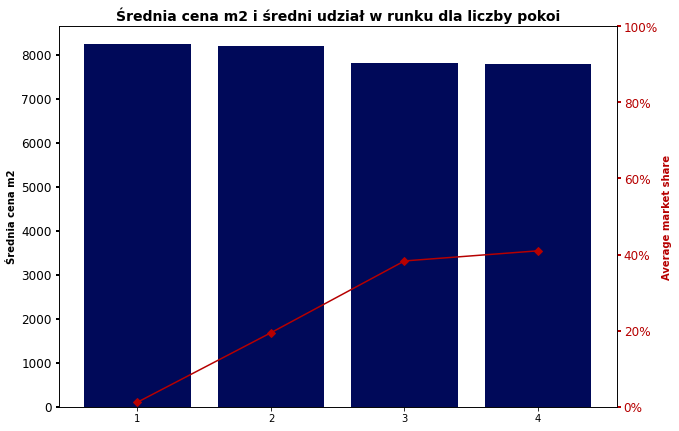

In [52]:
combo_visual(df_rooms)

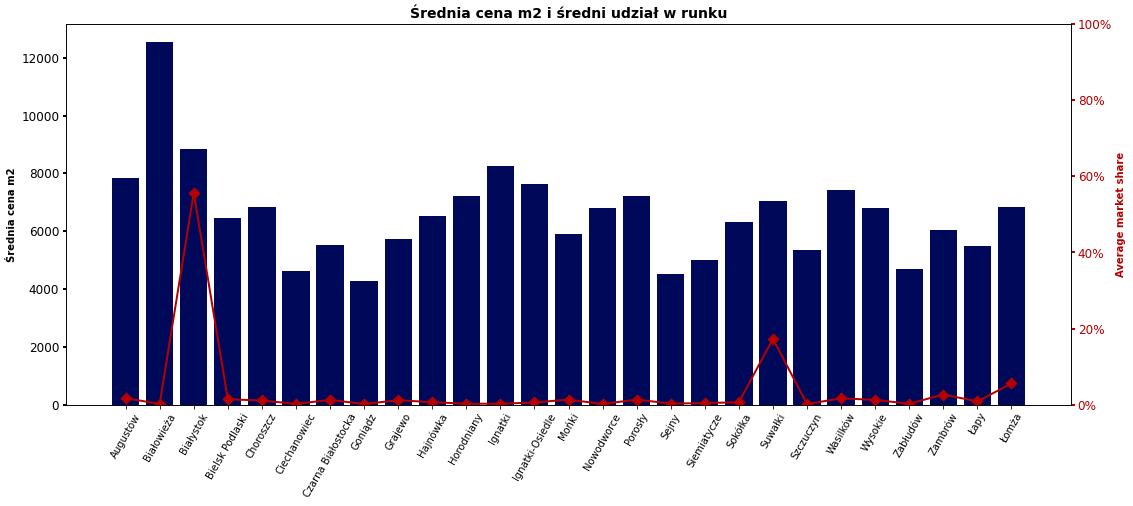

In [118]:
combo_visual(df_city)
#tylko miasta, w których było więcej niż 3 ogłoszenia

,Średnia
rooms,
1,8233.865289
2,8197.609220
3,7807.332305
4,7782.670488


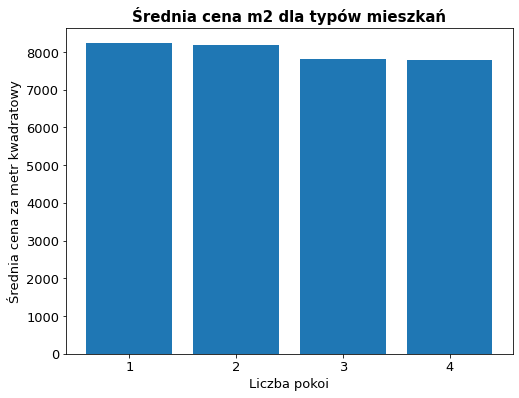

<Figure size 432x288 with 0 Axes>

In [8]:
plt.figure(figsize=(8,6))
df_chart = df_concat.groupby(by=['rooms'])["cena m2"].agg(["mean"])  
df_chart.columns = ["Średnia"]
x = df_chart.index.astype(str)  # wartości na osi x
y = df_chart['Średnia']# wartości na osi y 

plt.yticks(fontsize = 13)
plt.xticks(fontsize = 13)
plt.ylabel('Średnia cena za metr kwadratowy', fontsize = 13)
plt.xlabel('Liczba pokoi', fontsize = 13)
plt.title('Średnia cena m2 dla typów mieszkań', fontsize=15, fontweight='bold')
plt.bar(x, y)
plt.figure()

df_chart

,Średnia
rooms,
1,239309.633333
2,329020.567909
3,382317.788959
4,397252.015044


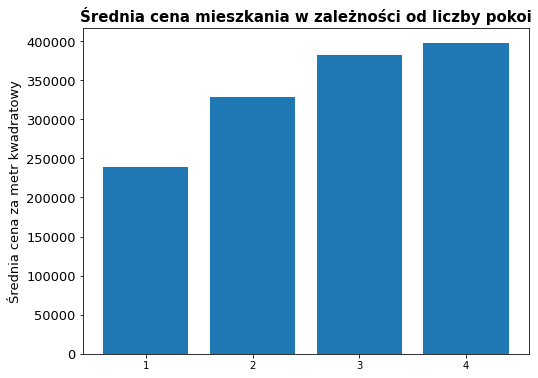

<Figure size 432x288 with 0 Axes>

In [9]:
plt.figure(figsize=(8,6))
df_chart = df_concat.groupby(by=['rooms'])["price"].agg(["mean"])  
df_chart.columns = ["Średnia"]
x = df_chart.index.astype(str)  # wartości na osi x
y = df_chart['Średnia']# wartości na osi y 
plt.yticks(fontsize = 13)
plt.ylabel('Średnia cena za mieszkanie', fontsize = 13)
plt.ylabel('Średnia cena za metr kwadratowy', fontsize = 13)
plt.title('Średnia cena mieszkania w zależności od liczby pokoi', fontsize=15, fontweight='bold')
plt.bar(x, y)
plt.figure()

df_chart

,Średnia,Liczba
city,,
Augustów,7852.070973,42
Białowieża,12535.388888,5
Białystok,8833.281908,1381
Bielsk Podlaski,6445.184572,35
Choroszcz,6827.988524,27
Ciechanowiec,4608.460846,5
Czarna Białostocka,5527.866269,31
Goniądz,4264.705882,4
Grajewo,5737.487496,29


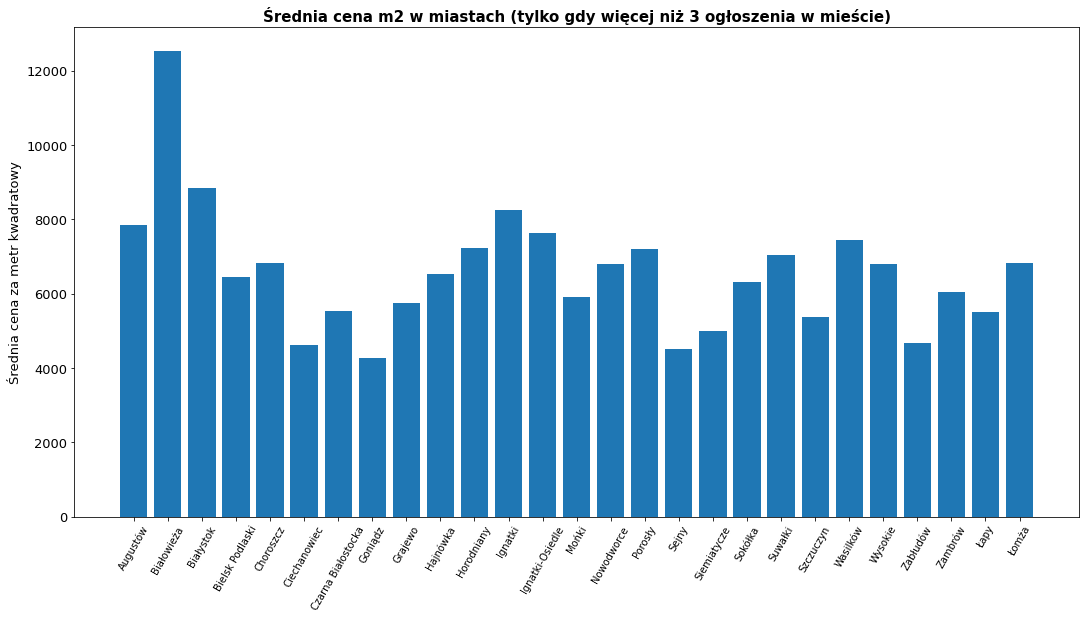

<Figure size 432x288 with 0 Axes>

In [29]:
plt.figure(figsize=(18,9))
df_chart = df_concat.groupby(by=['city'])["cena m2"].agg(["mean","count"])  
df_chart.columns = (["Średnia","Liczba"])
df_chart = df_chart.loc[df_chart['Liczba'] > 3]
x = df_chart.index.astype(str)  # wartości na osi x
y = df_chart['Średnia']# wartości na osi y 
plt.xticks(rotation = 60)
plt.yticks(fontsize = 13)
plt.ylabel('Średnia cena za metr kwadratowy', fontsize = 13)
plt.title("Średnia cena m2 w miastach (tylko gdy więcej niż 3 ogłoszenia w mieście)", fontsize=15, fontweight='bold')
plt.bar(x, y)
plt.figure()

df_chart

<AxesSubplot:xlabel='city'>

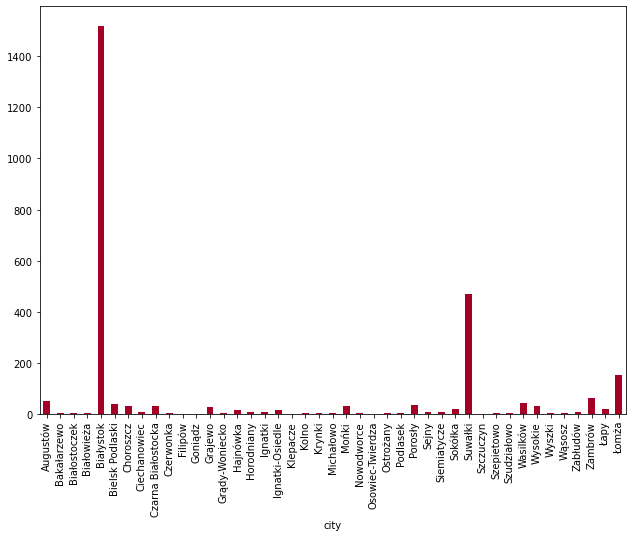

In [99]:
df.groupby("city") \
    .count()["title"] \
    .plot.bar(figsize=(10.5, 7.5), cmap="RdYlGn")

<AxesSubplot:ylabel='city'>

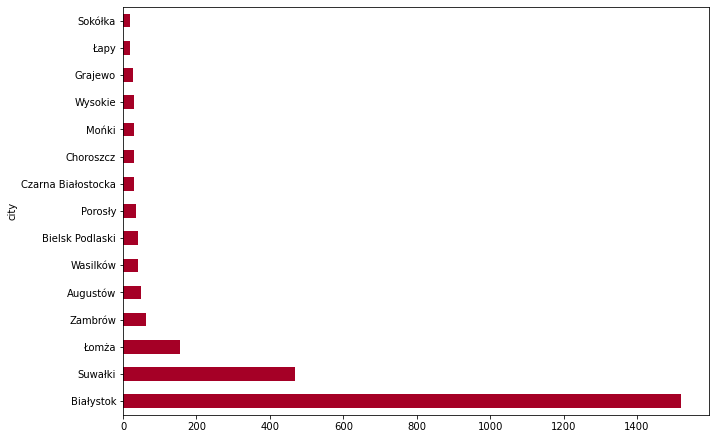

In [100]:
#ilość ogłoszeń dla poszczególnych miast
df.groupby("city") \
    .count()["title"] \
    .sort_values(ascending=False) \
    .head(n=15) \
    .plot.barh(figsize=(10.5, 7.5), cmap="RdYlGn")